<h1 style="color:#FF0000"><center>DETECTOR DE PLACAS VEHICULARES</center></h1>
<h2><center>PROCESAMIENTO DIGITAL DE SEÑALES</center></h2>

Car RGB: (960, 720, 3)
Car Gray: (960, 720)


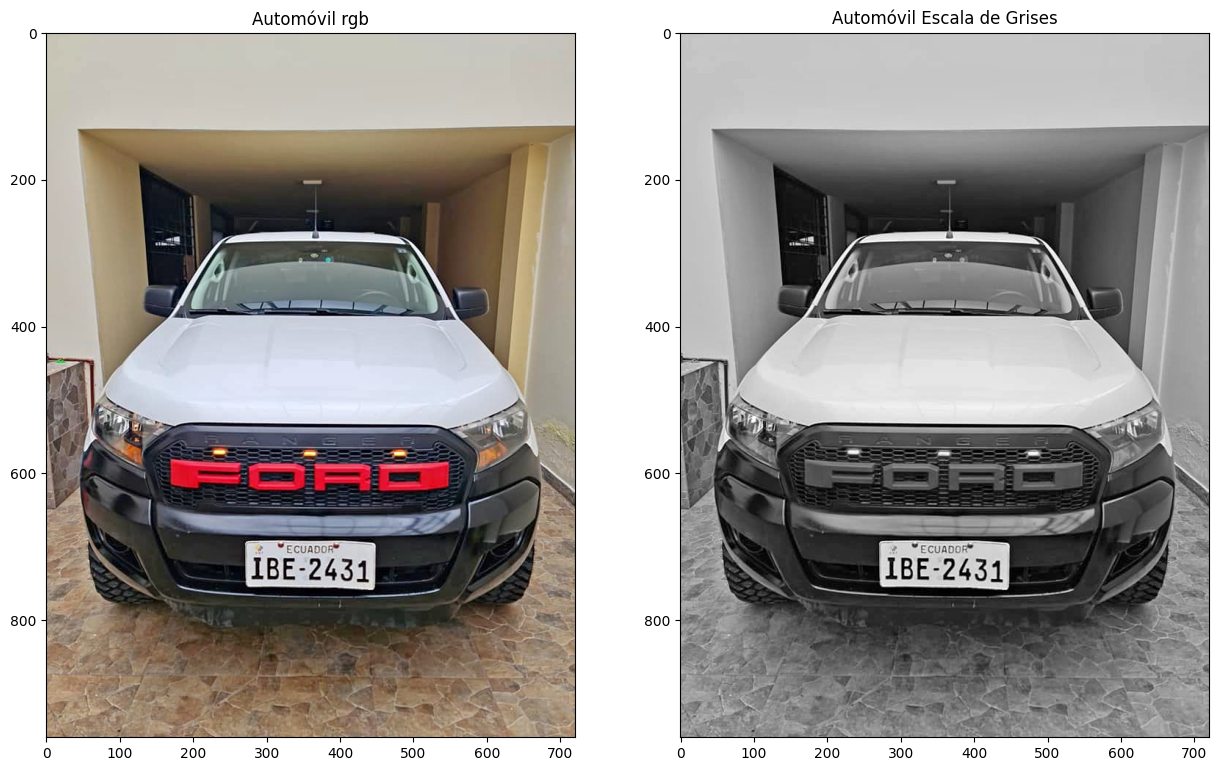

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pytesseract

#MPS.jpg
name_img = r"C:\Users\curim\Desktop\PlacasVehiculares.PDS\Reconocimineto_Placas\placas\05IBE.jpg"#GSH.jpg

car = plt.imread(name_img)
car1 = plt.imread(name_img)
#car = imagen[500:1200,:,:]  #Cortamos la matriz para recortar la imagen.

img1 =car[:,:,0] * 0.3
img2 =car[:,:,1] * 0.59
img3 =car[:,:,2] * 0.11

car_gray = img1+img2+img3


print(f'Car RGB: {car.shape}')
print(f'Car Gray: {car_gray.shape}')

''' -----------------------------------------------------------------------------'''

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(car)
plt.title('Automóvil rgb')
plt.axis('on')

plt.subplot(1,2,2)
plt.imshow(car_gray, cmap = 'gray' ) 
plt.title('Automóvil Escala de Grises')
plt.axis('on')
plt.show()

Dimensiones: (960, 720)
(960, 720)


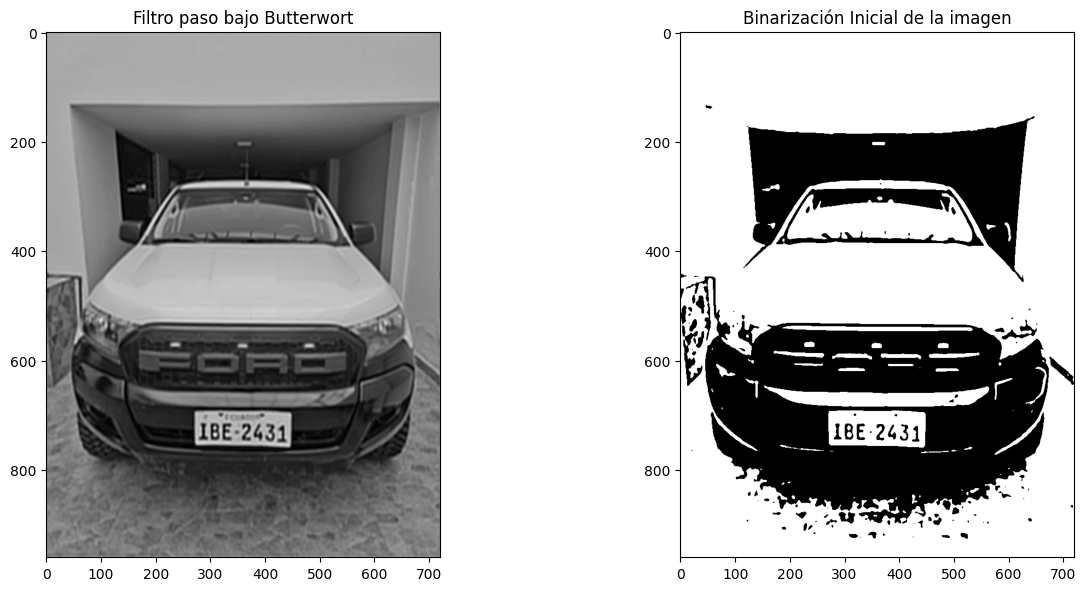

In [8]:
'''Segmentación'''

# Abrimos imagen 
f = car_gray

# Transformamos la imagen en frecuencia 
F = np.fft.fft2(f) #Calcule la transformada de Fourier discreta bidimensional
Fshift = np.fft.fftshift(F) #visualizar una transformada de Fourier con el componente 
                            #de frecuencia cero en el medio del espectro.

# Filtro de paso bajo Butterwort
M,N = f.shape # Devuelve una tupla con las dimensiones del array
print(f'Dimensiones: {M,N}')

H = np.zeros((M,N), dtype=np.float32)
D0 = 100# corte de frecuencia 30
n = 10 # orden
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)
# filtros de imagen de dominio de frecuencia
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g1 = np.abs(np.fft.ifft2(G))
l =g1

#----------------------------------------------------------------

'''----------------------------------------------------------------'''
# Gráfico Filtro de paso bajo Butterwort
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.imshow(g1, cmap='gray')
plt.title('Filtro paso bajo Butterwort')
plt.axis('on')
#----------------------------------------------------------------
#Umbralizacion Binaria
I = g1

[fil, col] = I.shape
for o in range (0, fil):
    for oo in range (0, col):
        if I[o, oo] < 100: #Pixel menor a 80 se vuelve 0   - 75
            I[o,oo] = 0
for o in range(0,fil):
    for oo in range(0,col):
        if I[o, oo] > 0: #Pixel mayor que cero se vuelve 1
            I[o,oo]= 1

print(I.shape)

# Binarizacion de la imagen
plt.subplot(2,2,2)
plt.imshow(I, cmap='gray')
plt.title('Binarización Inicial de la imagen')
plt.axis('on')
plt.show()

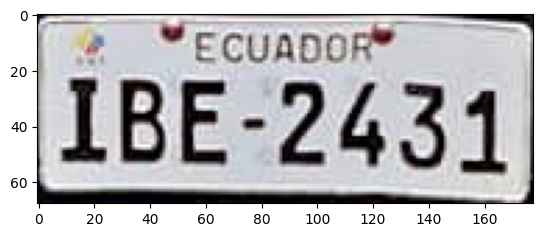

In [9]:
img_new = I.astype(np.uint8)

contornos, jerarquia = cv.findContours(img_new, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
#cv.drawContours(car, contornos,41, (0,255,0), 4) # 53 52
#print(f'{contornos[30]}:')

#print(contornos)

'''
for i in range(len(contornos)):
    cv.drawContours(car, contornos,i, (0,255,0), 1)
    plt.imshow(car, cmap='gray')
    print(i)
    plt.show()
'''
for c in contornos:
  area = cv.contourArea(c)
  x,y,w,h = cv.boundingRect(c)
  epsilon = 0.09*cv.arcLength(c,True)
  approx = cv.approxPolyDP(c,epsilon,True)
  #print(area)
  if len(approx)==4 and area > 1000:# Area: 6000
    break

placa = car[y:y+h, x:x+w]

plt.imshow(placa)


Car RGB: (68, 178, 3)
Car Gray: (68, 178)


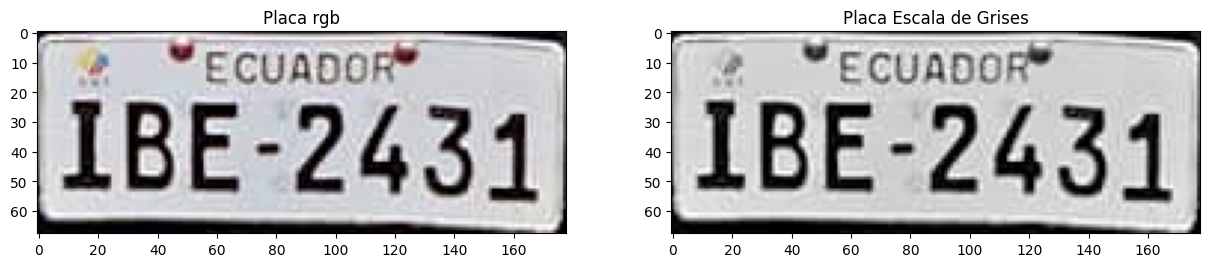

In [10]:
img1 =placa[:,:,0] * 0.3
img2 =placa[:,:,1] * 0.59
img3 =placa[:,:,2] * 0.11

placa_gray = img1+img2+img3


print(f'Car RGB: {placa.shape}')
print(f'Car Gray: {placa_gray.shape}')

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(placa)
plt.title('Placa rgb')
plt.axis('on')

plt.subplot(1,2,2)
plt.imshow(placa_gray, cmap = 'gray' ) 
plt.title('Placa Escala de Grises')
plt.axis('on')
plt.show()

Dimensiones: (68, 178)
(68, 178)


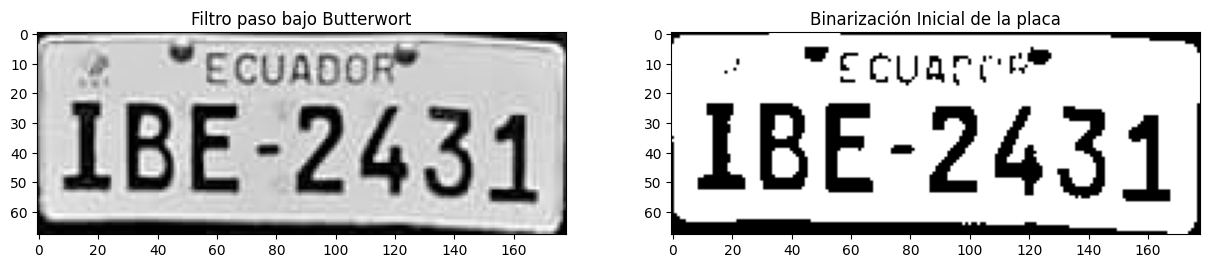

In [11]:
'''Segmentación de la placa'''

# Abrimos imagen 
f = placa_gray

# Transformamos la imagen en frecuencia 
F = np.fft.fft2(f) #Calcule la transformada de Fourier discreta bidimensional
Fshift = np.fft.fftshift(F) #visualizar una transformada de Fourier con el componente 
                            #de frecuencia cero en el medio del espectro.

# Filtro de paso bajo Butterwort
M,N = f.shape # Devuelve una tupla con las dimensiones del array
print(f'Dimensiones: {M,N}')

H = np.zeros((M,N), dtype=np.float32)
D0 = 100# corte de frecuencia 30
n = 10 # orden
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)
# filtros de imagen de dominio de frecuencia
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g1 = np.abs(np.fft.ifft2(G))
l =g1

#----------------------------------------------------------------

'''----------------------------------------------------------------'''
# Gráfico Filtro de paso bajo Butterwort
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.imshow(g1, cmap='gray')
plt.title('Filtro paso bajo Butterwort')
plt.axis('on')
#----------------------------------------------------------------
#Umbralizacion Binaria
I = g1

[fil, col] = I.shape
for o in range (0, fil):
    for oo in range (0, col):
        if I[o, oo] < 120: #Pixel menor a 80 se vuelve 0   - 75
            I[o,oo] = 0
for o in range(0,fil):
    for oo in range(0,col):
        if I[o, oo] > 0: #Pixel mayor que cero se vuelve 1
            I[o,oo]= 1

print(I.shape)

# Binarizacion de la imagen
plt.subplot(2,2,2)
plt.imshow(I, cmap='gray')
plt.title('Binarización Inicial de la placa')
plt.axis('on')
plt.show()

PLACA VEHICULAR:  IBE-2431


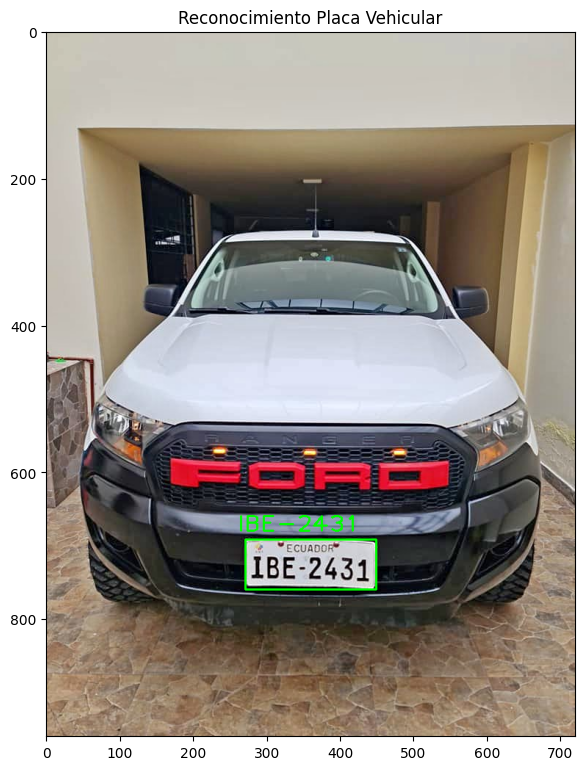

In [12]:
'''Técnicas OCR'''
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
image = I.astype(np.uint8)
text = pytesseract.image_to_string(image) # ,lang='spa'

import re
def filtrar_letra(texto):
    return re.sub(r'[^\w\-]','',texto) 
text = filtrar_letra(text) 

#text = (text[:-2])
print('PLACA VEHICULAR: ',text)
#print(len(text))

'''Resultado Final'''
cv.rectangle(car,(x,y),(x+w,y+h),(0,255,0),2)
cv.putText(car,text,(x-10,y-10),1,2.2,(0,255,0),2)

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(car)
plt.title('Reconocimiento Placa Vehicular')
plt.axis('on')
plt.show()